In [1]:
from netCDF4 import Dataset
import numpy as np

filename = 'ff_trs_neg.nc'
dataset = Dataset(filename, 'r')
nc_vars = [var for var in dataset.variables]

#Variable Information
for var in nc_vars:
    print('\tName:', var)
    print("\t\tdimensions:", dataset.variables[var].dimensions)
    #print("\t\tunits:", dataset.variables[var].units)
    print("\t\tsize:", dataset.variables[var].size)

	Name: TRACK_ID
		dimensions: ('tracks',)
		size: 981
	Name: FIRST_PT
		dimensions: ('tracks',)
		size: 981
	Name: NUM_PTS
		dimensions: ('tracks',)
		size: 981
	Name: index
		dimensions: ('record',)
		size: 18241
	Name: time
		dimensions: ('record',)
		size: 18241
	Name: longitude
		dimensions: ('record',)
		size: 18241
	Name: latitude
		dimensions: ('record',)
		size: 18241
	Name: pressure_sea_level
		dimensions: ('record',)
		size: 18241


In [2]:
#dataset.variables['pressure_sea_level'][0:10]

lons = dataset.variables['longitude'][:]
lats = dataset.variables['latitude'][:]
first_pts = dataset.variables['FIRST_PT'][:]
track_id = dataset.variables['TRACK_ID'][:]

In [5]:
list = dataset.variables['longitude'][400:500]
print(list)
newlist = ((list - 180) % 360) - 180
print(newlist)

[122.38839   45.050846  45.818253  45.322353  45.561665  46.89567
  49.424675  52.713703  57.24417   62.393982  67.63955   72.1761
  75.273476  76.2999    75.907364  75.37899   74.241554 200.12984
 203.4939   205.96506  207.62761  208.71442  209.69585  210.99438
 212.12854  213.84239  214.21347  212.77835  210.11227  204.28714
 199.21413  196.11128  193.74971  192.27762  191.42001  191.15114
 191.27382  191.63126  191.69322  298.78088  300.71594  305.22003
 305.7323   303.08142  297.30753  292.9898   286.11435  281.4975
 277.51407  273.94006  273.03253  273.29932  274.7337   278.18896
 279.29492  280.86816  283.29083   35.240437  38.599285  39.144077
  38.420036  39.478     39.608772  38.667667  38.21128   38.029842
  38.417244  38.816193  40.52374   40.277565  38.474445  36.30611
  35.27427   34.373337  34.643826 133.47461  133.7872   135.67538
 139.78473  141.65251  141.60072  141.40105  142.6988   144.93265
 148.33191  152.33563  157.31601  162.63171  166.27905  168.41798
 169.52473

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
from mpl_toolkits.basemap import addcyclic

<Figure size 432x288 with 0 Axes>

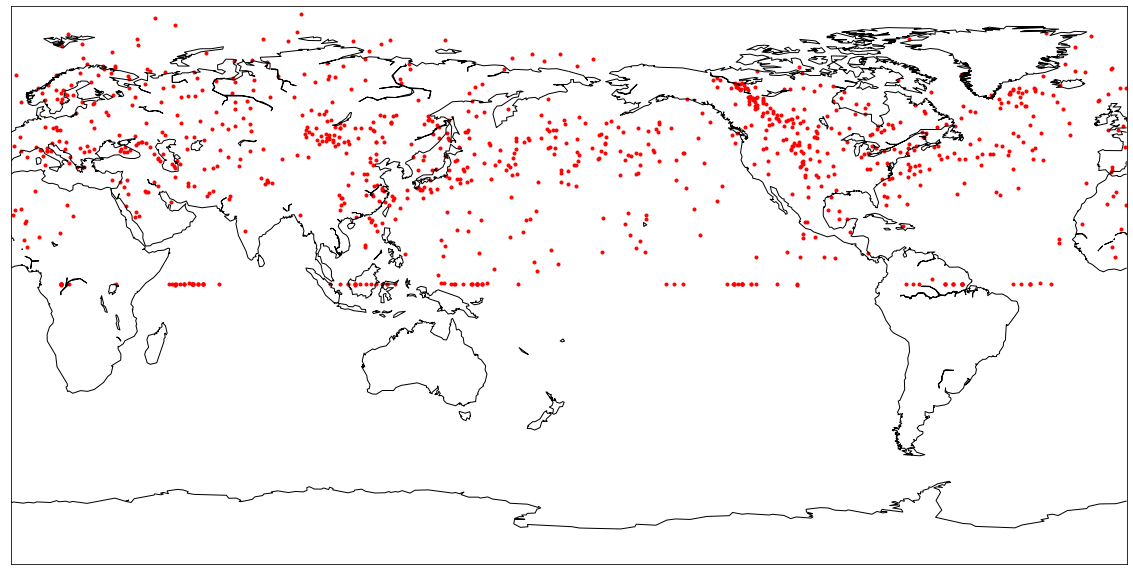

In [100]:
%matplotlib inline

fig1 = plt.figure()
plt.figure(figsize=(20,20))

#m=Basemap()

m = Basemap(projection='cyl', lon_0=180)
#m = Basemap(projection='npstere',boundinglat=10,lon_0=0,resolution='l')

m.drawcoastlines()
#m.fillcontinents()
#m.addcyclic()

#colors = {'CCM': 'red', 'SCME': 'white', 'SCM': 'yellow'}

for track in track_id[:-1]:

    latitudes = lats[first_pts[track]]#:first_pts[track+1]]
    longitudes = lons[first_pts[track]]#:first_pts[track+1]]
    
    #print(longitudes)
    
    #print("-----------------------------------------------------")
    
    lon = longitudes
    #lon = ((longitudes - 180) % 360) - 180
    
    #lats , lons = addcyclic(latitudes, longitudes)
    
    #longitudes = m.shiftdata(longitudes)
    #longitudes, latitudes = m.shiftdata(longitudes, latitudes)
    
    #print(lon)
    #print(latitudes)

    #Convert latitude and longitude to coordinates X and Y
    x, y = m(lon, latitudes)

    #Plot the points on the map
    #plt.plot(x,y,'-', label=track, color='red')
    #m.plot(x, y, marker=None,color='red')#, latlon=True)
    m.scatter(x, y, marker='.',color='r')#, latlon=True)


plt.show()

In [60]:
from matplotlib import cm as cmap

<Figure size 432x288 with 0 Axes>

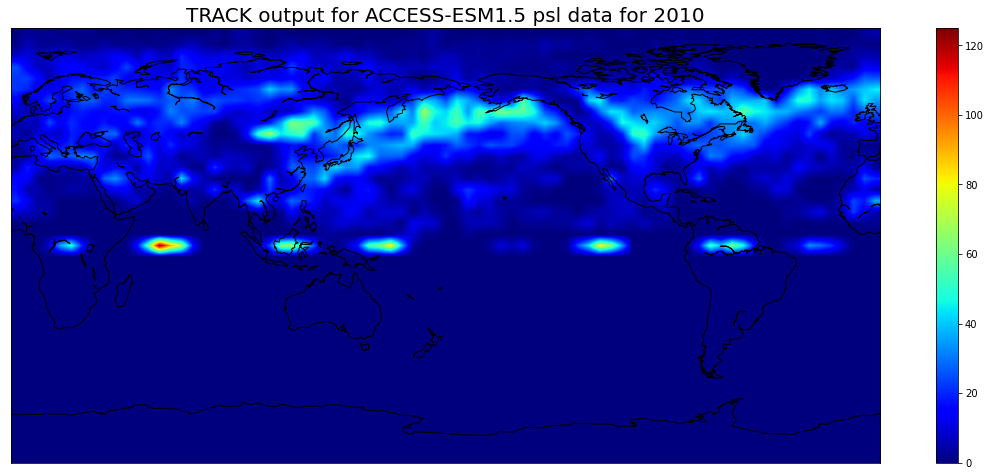

In [116]:
%matplotlib inline

fig1 = plt.figure()
plt.figure(figsize=(20,8))

#m=Basemap()

m = Basemap(projection='cyl', lon_0=180)
#m = Basemap(projection='npstere',boundinglat=10,lon_0=0,resolution='l')

m.drawcoastlines()

xs, ys = m(lons, (lats + 90)/2)

xedges = np.linspace(0, 360, 80)
yedges = np.linspace(0, 90, 40)

heatmap, xedges, yedges = np.histogram2d(xs, ys, bins=(xedges, yedges))

m.imshow(heatmap.T, interpolation='bilinear', cmap=cmap.jet)
plt.colorbar()
plt.title("TRACK output for ACCESS-ESM1.5 psl data for 2010", fontdict = {'fontsize' : 20})
plt.show()



In [66]:
print(lons[0:10])
print(xs[0:10])

[329.8091  334.1976  337.1819  339.502   341.452   342.7061  343.47845
 345.17624 347.00052 348.5003 ]
[329.8091  334.1976  337.1819  339.502   341.452   342.7061  343.47845
 345.17624 347.00052 348.5003 ]


162.80652
66.0722


<Figure size 432x288 with 0 Axes>

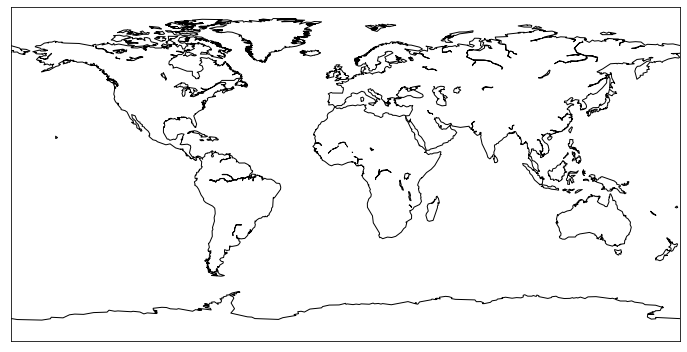

In [23]:
%matplotlib inline

fig1 = plt.figure()
plt.figure(figsize=(12,17))

m=Basemap()
 
m.drawcoastlines()
#m.fillcontinents()

#colors = {'CCM': 'red', 'SCME': 'white', 'SCM': 'yellow'}

#for track in track_id[:-1]:

    #latitudes = lats[first_pts[track]:first_pts[track+1]]
    #longitudes = lons[first_pts[track]:first_pts[track+1]]

    #Convert latitude and longitude to coordinates X and Y
    #x, y = m(longitudes, latitudes)

    #Plot the points on the map
    #plt.plot(x,y,'-', label=track, color='red')

x, y = m(lons[0],lats[0])

print(x)
print(y)

plt.show()

In [1]:
import cf
import cfplot as cfp


In [2]:
f=cf.read('ff_trs_neg.nc')[0]
cfp.traj(f)

TypeError: 


traj error
missing longitudes in the field auxiliary data
missing latitudes in the field auxiliary data



